# Linear Regression Lab

This workbook is to accompany the PDF on Moodle. I will go through a simple linear regression example, then ask you to build multiple different ones. I will build the model by referring to the PDF

step 1, import the things we probably always want

In [670]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


These ones are not for always, but I like this plotting style for this workbook

In [671]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15
y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [672]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

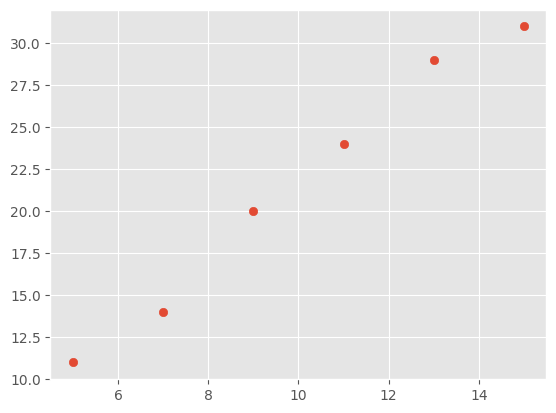

In [673]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient (if you don't know what this, don't worry about it

In [674]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Referring to section 2 Data Structure of the PDF let's look at X and y in more detail

In [675]:
y.shape

(6,)

In [676]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [677]:
X.shape

(6,)

In [678]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [679]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [680]:
X = X.reshape(-1,1)

In [681]:
X.shape

(6, 1)

In [682]:
X.ndim

2

2d array. Good. Let's look at it

In [683]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [684]:
from sklearn.linear_model import LinearRegression

In [685]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

tol : float, default=1e-6
    The precision of the solution (`coef_`) is determined by `tol` which
    specifies a different convergence criterion for the `lsqr` solver.
    `tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` when
    fitting on sparse training da

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [686]:
model = LinearRegression()

Now "fit" the model using x and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [687]:
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Section 4 Inferences

In [688]:
model.coef_

array([2.12857143])

In [689]:
model.intercept_

np.float64(0.2142857142857153)

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [690]:
w0 = model.intercept_
w1 = model.coef_[0]

In [691]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [692]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [693]:
pred = model.predict(X)

In [694]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [695]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

They're the same.

## Section 5 Evaluation

In this section, we are using the same data we trained the model on to also evaluate it.

When you fit a linear model and then compute quantities on the same data, you are answering questions of the form: "Given this dataset, how well does this model explain the observed variation?"

From a statistical perspective, this is entirely legitimate. However, we are doing a module on Machine Learning so the scores are very optimistic and should not really be used to make machine learning decisions.

PDF Section 5 should be read with this workbook

In [696]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [697]:
mse(y,pred)

0.723809523809522

In [698]:
r2(y,pred)

0.9864918906909576

Very close to 1!

Root Mean Squared Error

In [699]:
rmse = np.sqrt(mse(y,pred))

In [700]:
rmse

np.float64(0.8507699593953244)

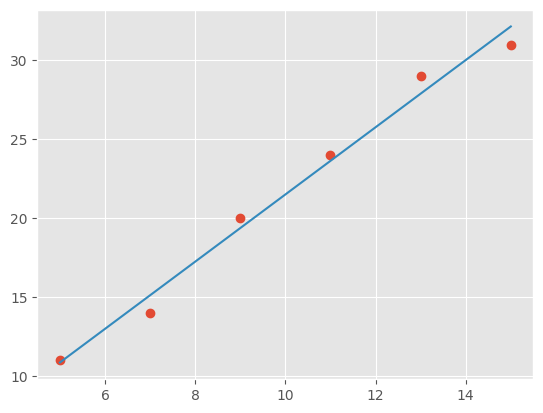

In [701]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [702]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

# Work for you now

We assume that the value of cars goes down with age, can we make a model that will predict the value of a particular type of car, just by looking at its age

This is a collection of data for a particular make and model of car. The person collecting the data recorded the age of a car and its value. 

You should notice there are cars that are 5 years of age yet have different values, this is because there is variance that our model is not capturing but maybe it can show some interesting things

In [703]:
X=np.array([5,4,6,5,5,5,6,6,2,7,7])
y=np.array([85,103,70,82,89,98,66,95,169,70,48])

Go build and evaluate a model for this

First plot the data to check if Linear is a good choice

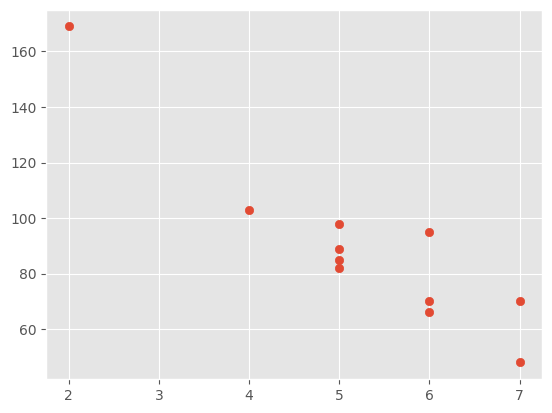

In [704]:
plt.scatter(X,y)
plt.show()

Add the correlation coefficient

In [705]:
np.corrcoef(X, y)

array([[ 1.        , -0.92378209],
       [-0.92378209,  1.        ]])

Next check the data shape and structure

In [706]:
print("Shape of y is:", y.shape)
print("Dimensions of y is:", y.ndim)

Shape of y is: (11,)
Dimensions of y is: 1


In [707]:
print("Shape of X is:", X.shape)
print("Dimensions of X is:", X.ndim)

Shape of X is: (11,)
Dimensions of X is: 1


Change to 2D array instead of 1D

In [708]:
X = X.reshape(-1,1)
print("Shape of X is:", X.shape)
print("Dimensions of X is:", X.ndim)

Shape of X is: (11, 1)
Dimensions of X is: 2


Now build the model & fit

In [709]:
model = LinearRegression()
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Next up is inferences/predictions

In [710]:
print("Model coefficiency:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficiency: [-20.26126126]
Model intercept: 195.46846846846847


In [711]:
w0 = model.intercept_
w1 = model.coef_[0]

Prediction

In [712]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)
print("Prediction:", predictions)

Prediction: [[ 94.16216216 114.42342342  73.9009009   94.16216216  94.16216216
   94.16216216  73.9009009   73.9009009  154.94594595  53.63963964
   53.63963964]]


In [713]:
# Using the built in .predict
pred = model.predict(X)
print("Predictions from .predict:", pred)

pred == predictions

Predictions from .predict: [ 94.16216216 114.42342342  73.9009009   94.16216216  94.16216216
  94.16216216  73.9009009   73.9009009  154.94594595  53.63963964
  53.63963964]


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

Evaluate the data

In [714]:
print("Mean-squared error")
mse(y,pred)

Mean-squared error


129.41195741195742

In [715]:
print("r^2 error")
r2(y,pred)

r^2 error


0.8533733463785714

In [716]:
print("Root mean-squared error")
rmse = np.sqrt(mse(y,pred))
rmse

Root mean-squared error


np.float64(11.3759376497921)

Plot & Score

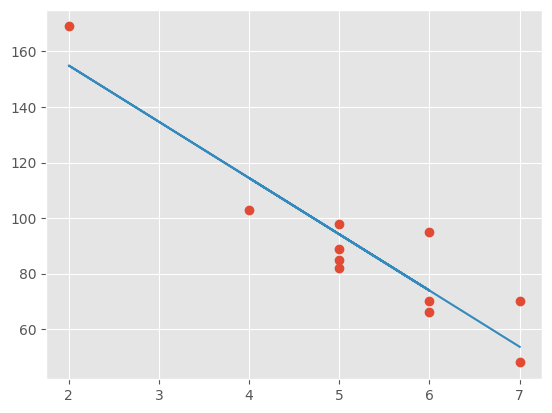

In [717]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

In [718]:
model.score(X,y)

0.8533733463785714

## Section 6 Model Selection

Section 6 of PDF is this. It follows on from Monday's lecture.

We are going to first of all generate a new dataset that has 3 features $x_1$, $x_2$ and $x_3$

Then we are going to evaluate multiple models and choose the "best" one, select a model to use

In [719]:
## This generates some X and y for us to use
np.random.seed(0)
n = 500
x1 = np.random.normal(size=n)          # strong predictor
x2 = np.random.normal(size=n) * 0.5    # weak predictor
x3 = np.random.normal(size=n)          # noise
y = 3*x1 + 0.5*x2 + np.random.normal(scale=0.5, size=n)

X = np.column_stack([x1, x2, x3])


### Why Validation and not Test?
As we are going to make a decision about which model to use, we cannot use a "test" set. 

Always use validation to make decisions.

You may need to import the train_test_split function (from sklearn.model_selection import train_test_split)

The code below will give us two sets, Training and Validation, 30% of the set will be validation and I am setting the random_state for reproducibility

In [720]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

The below will make a model using the first column only i.e.

$$ \hat{y} = w_0 + w_1x_1 $$

it will then get the score for the model for both training and validation sets

In [ ]:
model = LinearRegression().fit(X_train[:, [0]], y_train)
train_r2 = model.score(X_train[:, [0]], y_train)
val_r2 = r2_score(y_val, model.predict(X_val[:, cols]))
print(f"{name:15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

You now want to make more models, try the following ones
$$ \hat{y} = w_0 + w_1x_2$$
$$ \hat{y} = w_0 + w_1x_1 + w_2x_2$$
$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3$$

Which of the models performs best in the validation set?

Does that correlate with the training score?

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a validation set.

In [ ]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

Split your data into a training set and a validation set

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

In [ ]:
#your code (if any) here

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error and r2 score for the sets

In [ ]:
#your code here
#define  predictor and response for set




In [ ]:
#your code here
# create linear regression object with sklearn


#your code here
# train the model and make predictions


#your code here
#print out coefficients



In [ ]:
# your code here
# Plot outputs


## Multiple linear regression with automobile data

> **EXERCISE:** With sklearn, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions.

>How do these mean squared errors compare to those from the simple linear regression?

>Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [ ]:
#your code here


# Diabetes Dataset

Now we are going to do similar with the diabetes dataset built into sklearn

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

In [ ]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [ ]:
X = data 
y = diabetes.target

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X,y)

In [ ]:
r_squared = lr.score(X,y)

Let's do a slightly different r2

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out, from past stuff I've done, you would get a better model without age, s3, s4 and s6. Maybe we'll look into that later

In [ ]:
X = data.drop(["age"], axis=1)

In [ ]:
lr = LinearRegression()
lr.fit(X,y)

In [ ]:
lr.score(X,y)

In [ ]:
r_squared = lr.score(X,y)

r2 score is the same, but your lecturer said it should be better. Well R2 is not always the best, there is an adjusted r2

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

Slightly better than the model with age included.

There are lots of other metrics that could be used, some could be better than others, typically we look at multiple ones to make our determination

Would Root Mean Squared Error be useful? Probably should use a validation set to do some model selection